In [1]:
import tensorflow as tf

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import PIL

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from PIL import Image,ImageDraw
from PIL.ImageDraw import Draw

In [4]:
os.chdir('C:\\Users\\George\\Documents\\Python Scripts\\DeepTest\\Radix_NNdata')
os.getcwd()

'C:\\Users\\George\\Documents\\Python Scripts\\DeepTest\\Radix_NNdata'

In [7]:
#load training dataset
os.chdir('C:\\Users\\George\\Documents\\Python Scripts\\DeepTest\\Radix_NNdata\\TrainSet')
bbs = pd.read_csv('bb.csv',header = None)

train_data = [f for f in os.listdir() if '.jpg' in f]
train_images = []

for i in range(len(train_data)):
    image_name = 'data{}.jpg'.format(i)
    train_img = np.asarray(Image.open(image_name))    
    train_images.append(train_img)
    
train_targets = np.array(bbs,dtype = "float32")/128.0
train_images = np.array(train_images,dtype = "float32")/255.0

In [9]:
#load validation dataset
os.chdir('C:\\Users\\George\\Documents\\Python Scripts\\DeepTest\\Radix_NNdata\\ValidationSet')
bbs = pd.read_csv('bb.csv',header = None)

val_data = [f for f in os.listdir() if '.jpg' in f]
val_images = []

#for i in range(len(train_targets)):
for i in range(len(val_data)):
    image_name = 'data{}.jpg'.format(i)
    val_img = np.asarray(Image.open(image_name))    
    val_images.append(val_img)
    
val_targets = np.array(bbs,dtype = "float32")/128.0
val_images = np.array(val_images,dtype = "float32")/255.0

In [10]:
#start model
height,width = 128,128
input_shape = (height,width,1) #grayscale
input_layer = tf.keras.layers.Input(input_shape)

#create the base layers - maxpooling parameter - perhaps not necessary yet?
base_layers = layers.Conv2D(16, 3, padding='same', activation='relu', name='bl_2')(input_layer)
base_layers = layers.MaxPooling2D(name='bl_3')(base_layers)
base_layers = layers.Conv2D(32, 3, padding='same', activation='relu', name='bl_4')(base_layers)
base_layers = layers.MaxPooling2D(name='bl_5')(base_layers)
base_layers = layers.Conv2D(64, 3, padding='same', activation='relu', name='bl_6')(base_layers)
base_layers = layers.MaxPooling2D(name='bl_7')(base_layers)
base_layers = layers.Flatten(name='bl_8')(base_layers)

In [11]:
#create output layer
locator_branch = layers.Dense(128, activation='relu', name='bb_1')(base_layers)
locator_branch = layers.Dense(64, activation='relu', name='bb_2')(locator_branch)
locator_branch = layers.Dense(32, activation='relu', name='bb_3')(locator_branch)
locator_branch = layers.Dense(4, activation='sigmoid', name='bb_head')(locator_branch)

In [12]:
model = tf.keras.Model(input_layer,locator_branch)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 bl_2 (Conv2D)               (None, 128, 128, 16)      160       
                                                                 
 bl_3 (MaxPooling2D)         (None, 64, 64, 16)        0         
                                                                 
 bl_4 (Conv2D)               (None, 64, 64, 32)        4640      
                                                                 
 bl_5 (MaxPooling2D)         (None, 32, 32, 32)        0         
                                                                 
 bl_6 (Conv2D)               (None, 32, 32, 64)        18496     
                                                                 
 bl_7 (MaxPooling2D)         (None, 16, 16, 64)        0     

In [14]:
val_targets[0],train_targets[0]

(array([0.7578125, 0.75     , 0.21875  , 0.1953125], dtype=float32),
 array([0.       , 0.5234375, 0.140625 , 0.2109375], dtype=float32))

In [15]:
model.compile(loss = tf.keras.losses.MSE, optimizer = 'Adam', metrics = ['accuracy']) 

In [16]:
val_targets

array([[0.7578125, 0.75     , 0.21875  , 0.1953125],
       [0.78125  , 0.5390625, 0.2265625, 0.171875 ],
       [0.6171875, 0.1328125, 0.265625 , 0.328125 ],
       ...,
       [0.4375   , 0.7578125, 0.2890625, 0.203125 ],
       [0.1328125, 0.375    , 0.1484375, 0.1953125],
       [0.125    , 0.71875  , 0.234375 , 0.1640625]], dtype=float32)

In [18]:
history = model.fit(train_images,train_targets,
                   validation_data = (val_images, val_targets),
                   batch_size = 20,
                   epochs = 30,
                   shuffle = True,
                   verbose = 1)

Epoch 1/30
169/169 [==============================] - 10s 62ms/step - loss: 0.0042 - accuracy: 0.8878 - val_loss: 0.0041 - val_accuracy: 0.9112
Epoch 2/30
169/169 [==============================] - 11s 62ms/step - loss: 0.0034 - accuracy: 0.9104 - val_loss: 0.0037 - val_accuracy: 0.9105
Epoch 3/30
169/169 [==============================] - 10s 62ms/step - loss: 0.0029 - accuracy: 0.9143 - val_loss: 0.0031 - val_accuracy: 0.9015
Epoch 4/30
169/169 [==============================] - 11s 63ms/step - loss: 0.0024 - accuracy: 0.9244 - val_loss: 0.0029 - val_accuracy: 0.9147
Epoch 5/30
169/169 [==============================] - 10s 62ms/step - loss: 0.0022 - accuracy: 0.9271 - val_loss: 0.0027 - val_accuracy: 0.9154
Epoch 6/30
169/169 [==============================] - 11s 62ms/step - loss: 0.0021 - accuracy: 0.9304 - val_loss: 0.0024 - val_accuracy: 0.9223
Epoch 7/30
169/169 [==============================] - 11s 63ms/step - loss: 0.0019 - accuracy: 0.9363 - val_loss: 0.0020 - val_accuracy:

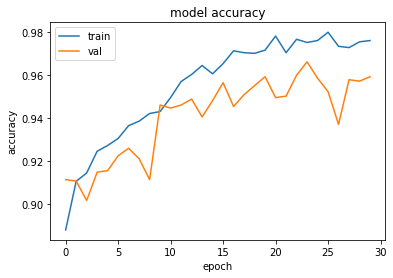

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

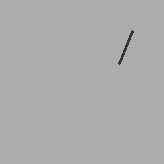

In [25]:
#predict on new image (test set of 10 images) ?? - Alex


In [26]:
#convert image to array and predict with model ?? - Alex


[118.384514  30.140718  11.692188  29.32327 ]


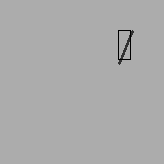

In [27]:
#display prediction ?? - Alex
